cross entropy loss　分類問題

In [ ]:
#　colaboraory用: Google drive をマウントする
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# colaboratory用: フォルダを移る
%cd "drive/My Drive/Colab Notebooks/"

/content/drive/My Drive/Colab Notebooks


フォルダは自分の指定のものに変更して下さい。

In [ ]:
%cd "ctorch210929/MiniCTorch_Prototype/notebook"

/content/drive/My Drive/Colab Notebooks/ctorch210929/MiniCTorch_Prototype/notebook


In [ ]:
! pip install lark-parser

In [ ]:
import sys
sys.path.append("../")

import json
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import minictorch.generator as GN
import minictorch.converter as CV

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

データ読み込み

In [ ]:
# データ読み込み
iris = datasets.load_iris()
data   = iris['data']
target = iris['target']

# 学習データと検証データに分割
x_train, x_valid, y_train, y_valid = train_test_split( data, target, shuffle=True )

# 特徴量の標準化
scaler = StandardScaler()
scaler.fit( x_train )

x_train = scaler.transform(x_train)
x_valid = scaler.transform(x_valid)

# Tensor型に変換
# 学習に入れるときはfloat型 or long型になっている必要があるのここで変換してしまう
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()
x_valid = torch.from_numpy(x_valid).float()
y_valid = torch.from_numpy(y_valid).long()

#print('x_train : ', x_train.shape)
#print('y_train : ', y_train.shape)
#print('x_valid : ', x_valid.shape)
#print('y_valid : ', y_valid.shape)

DataSetとDataLoaderの生成

In [ ]:
train_dataset = TensorDataset(x_train, y_train)
valid_dataset = TensorDataset(x_valid, y_valid)

# indexを指定すればデータを取り出すことができます。
index = 0
print( train_dataset.__getitem__(index)[0].size() )
print( train_dataset.__getitem__(index)[1] )


batch_size = 112
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# 動作確認
# こんな感じでバッチ単位で取り出す子ができます。
# イテレータに変換
batch_iterator = iter(train_dataloader)

# 1番目の要素を取り出す
inputs, labels = next(batch_iterator)
print(inputs.size())
print(labels.size())
#print(inputs)
print(labels)

torch.Size([4])
tensor(2)
torch.Size([112, 4])
torch.Size([112])
tensor([1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 1, 0, 0, 2, 0, 1,
        1, 2, 0, 1, 2, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2,
        2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 0, 0, 2, 0, 2, 1,
        1, 1, 0, 2, 1, 0, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 1, 1, 2, 0, 2, 2,
        0, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1])


ニューラルネットワークの定義

In [ ]:
class Net(nn.Module):    
    def __init__(self,t):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 3)
        self.target = t
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        #x = F.log_softmax(x, dim=1)
        self.out = x

        loss = nn.CrossEntropyLoss()
        #loss = nn.NLLLoss()
        output = loss(x,self.target)
        return output
        

class Net2(nn.Module):    
    def __init__(self):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 3)
        #self.fc1 = nn.Linear(4, 128)
        #self.fc2 = nn.Linear(128, 3)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        x = self.fc2(x)
        #x = F.softmax(x, dim=1)
        return x

In [ ]:
def generate_json( json_path, input, target ):

    model = Net( target )
    model.eval()
    with torch.no_grad():
        print("[SAVE]", json_path )
        GN.generate_minictorch_file( model, input, json_path )

    return model

In [ ]:
torch.manual_seed( 1 )

print("inputs",inputs)
print("target",labels)
inputs.requires_grad = True

project = 'cse1'
json_path = './network/' + project +'.json'

model = generate_json( json_path, inputs, labels )


inputs tensor([[-0.1710, -0.6233,  0.4113,  0.1211],
        [-1.4718,  1.2634, -1.5500, -1.2994],
        [-1.5900, -1.8025, -1.3819, -1.1703],
        [ 1.2480,  0.0842,  0.6354,  0.3793],
        [ 0.6567,  0.0842,  0.9716,  0.7667],
        [-0.9988,  1.0276, -1.3819, -1.1703],
        [ 0.7750, -0.1516,  1.1397,  1.2833],
        [ 0.5385,  0.7917,  1.0277,  1.5415],
        [-0.8805, -1.3308, -0.4293, -0.1372],
        [-0.9988,  0.7917, -1.2698, -1.2994],
        [ 0.6567, -0.8591,  0.8595,  0.8959],
        [ 2.0757, -0.1516,  1.5880,  1.1541],
        [ 0.3020, -0.3874,  0.5233,  0.2502],
        [-0.8805,  1.7351, -1.0457, -1.0411],
        [-1.1170,  0.0842, -1.2698, -1.2994],
        [ 0.5385, -0.6233,  0.7475,  0.3793],
        [-1.4718,  0.0842, -1.2698, -1.2994],
        [ 0.7750, -0.6233,  0.4673,  0.3793],
        [ 0.3020, -0.6233,  0.1311,  0.1211],
        [-1.3535,  0.3201, -1.3819, -1.2994],
        [-0.5258,  0.7917, -1.1577, -1.2994],
        [ 0.0655, -0.1516, 

In [ ]:
CV.convert_json( project, "./src", model, inputs, json_path )

[JSON] ./network/cse1.json
{'name': 'Net/Linear[fc1]/weight/35', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [3], 'sorted_id': 1}
{'name': 'Net/Linear[fc1]/bias/34', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [3], 'sorted_id': 2}
{'name': 'Net/Linear[fc2]/weight/38', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [7], 'sorted_id': 5}
{'name': 'Net/Linear[fc2]/bias/37', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [7], 'sorted_id': 6}
[PARAM] ./src/cse1_param.cpp
{'name': 'input/x', 'op': 'IO Node', 'in': [], 'output_id': 0, 'shape': [112, 4], 'out': [3], 'sorted_id': 0}
{'name': 'Net/Linear[fc1]/weight/35', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [3], 'sorted_id': 1}
Net/Linear[fc1]/weight/35  ->  fc1_weight
{'name': 'Net/Linear[fc1]/bias/34', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [3], 'sorted_id': 2}
Net/Linear[fc1]/bias/34  ->  f

In [ ]:
# check code
with torch.set_grad_enabled(True):
  
  output = model( inputs )
  print("output",output)

  model.zero_grad()
  output.backward()
  print("output grad",output.grad)
  print("input grad",inputs.grad)

  # ラベルを予測
  #print("output", model.out, inputs.size(0))
  _, preds = torch.max( model.out, 1 )

  # イテレーション結果の計算
  epoch_loss = output * inputs.size(0)

  # 正解数の合計を更新
  epoch_corrects = torch.sum( preds == labels.data )

  epoch_loss = epoch_loss / float(inputs.size(0))
  epoch_acc  = epoch_corrects.double() / float(inputs.size(0))

  epoch=1
  print('Train Loss {}: {:.4f} Acc: {:.4f}'.format( epoch, epoch_loss, epoch_acc ))

output tensor(1.1601, grad_fn=<NllLossBackward>)
output grad None
input grad tensor([[ 3.8844e-04, -8.2199e-05,  1.4423e-03, -1.0259e-03],
        [-1.6304e-03, -5.8838e-04,  3.9302e-04, -3.6282e-04],
        [-2.0818e-03, -1.0184e-03,  1.6581e-03, -5.6532e-04],
        [-5.1059e-04, -1.2330e-04, -6.4811e-04, -1.0453e-03],
        [ 7.5653e-04,  1.1319e-03, -8.5129e-04,  9.5496e-04],
        [-1.3675e-03, -5.9082e-04,  3.3255e-04, -3.1672e-04],
        [ 4.5632e-04,  1.4719e-03, -3.7993e-04,  7.6784e-04],
        [ 4.8434e-04,  1.0216e-03, -1.6423e-04,  8.4509e-04],
        [ 9.7461e-04, -3.7618e-04,  1.2009e-03,  4.5496e-04],
        [-1.3711e-03, -5.9843e-04,  3.3704e-04, -3.1642e-04],
        [ 1.2982e-03,  6.7970e-04, -9.6011e-04,  6.7615e-04],
        [ 9.1169e-04,  4.9826e-04, -5.2589e-05,  3.5811e-04],
        [-2.7863e-04, -4.9891e-04,  3.3928e-04, -1.6313e-03],
        [-1.4834e-03,  3.3193e-04,  3.7000e-04,  3.5512e-04],
        [-1.2651e-03, -5.6642e-04,  4.0925e-04, -3.1364

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  if __name__ == '__main__':


In [ ]:
!g++ -std=c++14 ./src/cse1.cpp ./src/cse1_param.cpp -D_NOTEBOOK -I ../../../xtensor -lcblas -o ./src/cse1

(注意) xtensorフォルダにxtensor関連のincludeを置いています。各自の環境に合わせて変更して下さい。

In [ ]:
!./src/cse1

### forward computation ...
 1.160111
### backward computation ...
input_grad{{ 0.000388, -0.000082,  0.001442, -0.001026},
 {-0.00163 , -0.000588,  0.000393, -0.000363},
 {-0.002082, -0.001018,  0.001658, -0.000565},
 {-0.000511, -0.000123, -0.000648, -0.001045},
 { 0.000757,  0.001132, -0.000851,  0.000955},
 {-0.001367, -0.000591,  0.000333, -0.000317},
 { 0.000456,  0.001472, -0.00038 ,  0.000768},
 { 0.000484,  0.001022, -0.000164,  0.000845},
 { 0.000975, -0.000376,  0.001201,  0.000455},
 {-0.001371, -0.000598,  0.000337, -0.000316},
 { 0.001298,  0.00068 , -0.00096 ,  0.000676},
 { 0.000912,  0.000498, -0.000053,  0.000358},
 {-0.000279, -0.000499,  0.000339, -0.001631},
 {-0.001483,  0.000332,  0.00037 ,  0.000355},
 {-0.001265, -0.000566,  0.000409, -0.000314},
 { 0.001179,  0.000775, -0.000708,  0.000957},
 {-0.001308, -0.000458,  0.00041 , -0.000462},
 {-0.000392, -0.000395, -0.00008 , -0.001208},
 {-0.000253, -0.000395,  0.00061 , -0.00073 },
 {-0.001342, -0.000488,  0.000

In [ ]:
torch.manual_seed( 1 )

#print("target",target)
inputs.requires_grad = True

#model = Net( labels )
model = Net2()

num = inputs.size(0)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD( model.parameters(), lr=0.01 )

num_epochs = 300

acc = []

for epoch in range(num_epochs):
  with torch.set_grad_enabled(True):

    model.train()   # モデルを訓練モードに設定

    outputs = model( inputs )

    loss = criterion( outputs, labels )
    print("loss ",epoch, " - ",loss)

    # ラベルを予測
    #print("output", outputs, num )
    _, preds = torch.max( outputs, 1 )

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # イテレーション結果の計算
    epoch_loss = loss.item() * float(num)

    # 正解数の合計を更新
    epoch_corrects = torch.sum( preds == labels )

    epoch_loss = epoch_loss / float(num)
    epoch_acc  = epoch_corrects.double() / float(num)
    print('Train Loss {}: {:.4f} Acc: {:.4f} {}'.format( epoch, epoch_loss, epoch_acc, epoch_corrects ))

    acc.append( epoch_acc )

loss  0  -  tensor(1.1601, grad_fn=<NllLossBackward>)
Train Loss 0: 1.1601 Acc: 0.1875 21
loss  1  -  tensor(1.1363, grad_fn=<NllLossBackward>)
Train Loss 1: 1.1363 Acc: 0.1875 21
loss  2  -  tensor(1.1135, grad_fn=<NllLossBackward>)
Train Loss 2: 1.1135 Acc: 0.1964 22
loss  3  -  tensor(1.0915, grad_fn=<NllLossBackward>)
Train Loss 3: 1.0915 Acc: 0.1786 20
loss  4  -  tensor(1.0704, grad_fn=<NllLossBackward>)
Train Loss 4: 1.0704 Acc: 0.1875 21
loss  5  -  tensor(1.0501, grad_fn=<NllLossBackward>)
Train Loss 5: 1.0501 Acc: 0.1964 22
loss  6  -  tensor(1.0307, grad_fn=<NllLossBackward>)
Train Loss 6: 1.0307 Acc: 0.1786 20
loss  7  -  tensor(1.0120, grad_fn=<NllLossBackward>)
Train Loss 7: 1.0120 Acc: 0.1875 21
loss  8  -  tensor(0.9941, grad_fn=<NllLossBackward>)
Train Loss 8: 0.9941 Acc: 0.2411 27
loss  9  -  tensor(0.9769, grad_fn=<NllLossBackward>)
Train Loss 9: 0.9769 Acc: 0.3036 34
loss  10  -  tensor(0.9605, grad_fn=<NllLossBackward>)
Train Loss 10: 0.9605 Acc: 0.3929 44
loss  11

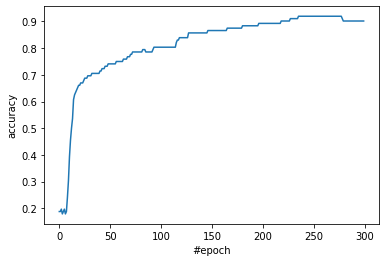

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(list(range(len(acc))),acc )
ax.set_xlabel('#epoch')
ax.set_ylabel('accuracy')
fig.show()

C++のコードは手作業で修正しています。

In [ ]:
!g++ -std=c++14 ./src/cse1.cpp ./src/cse1_param.cpp ./src/cse1_train.cpp -D_NOTEBOOK -I ../../../xtensor -lcblas -o ./src/cse1_train

In [ ]:
!./src/cse1_train

### forward computation ...
 1.160111
### backward computation ...
input_grad{{ 0.000388, -0.000082,  0.001442, -0.001026},
 {-0.00163 , -0.000588,  0.000393, -0.000363},
 {-0.002082, -0.001018,  0.001658, -0.000565},
 {-0.000511, -0.000123, -0.000648, -0.001045},
 { 0.000757,  0.001132, -0.000851,  0.000955},
 {-0.001367, -0.000591,  0.000333, -0.000317},
 { 0.000456,  0.001472, -0.00038 ,  0.000768},
 { 0.000484,  0.001022, -0.000164,  0.000845},
 { 0.000975, -0.000376,  0.001201,  0.000455},
 {-0.001371, -0.000598,  0.000337, -0.000316},
 { 0.001298,  0.00068 , -0.00096 ,  0.000676},
 { 0.000912,  0.000498, -0.000053,  0.000358},
 {-0.000279, -0.000499,  0.000339, -0.001631},
 {-0.001483,  0.000332,  0.00037 ,  0.000355},
 {-0.001265, -0.000566,  0.000409, -0.000314},
 { 0.001179,  0.000775, -0.000708,  0.000957},
 {-0.001308, -0.000458,  0.00041 , -0.000462},
 {-0.000392, -0.000395, -0.00008 , -0.001208},
 {-0.000253, -0.000395,  0.00061 , -0.00073 },
 {-0.001342, -0.000488,  0.000

In [ ]:
f = open('./src/cse1.out', 'r')

loss = []
acc=[]

datalist = f.readlines()
for data in datalist:
  #print(data)
  ds = data.split(',')
  loss.append( float(ds[0]) )
  acc.append( float(ds[1]) )

f.close()

print("epoch =", len(loss))
print( loss )

epoch = 300
[1.162463, 1.137182, 1.112908, 1.089613, 1.067268, 1.045844, 1.025309, 1.005637, 0.986794, 0.968748, 0.951466, 0.93492, 0.919077, 0.903905, 0.889377, 0.875462, 0.862132, 0.84936, 0.837119, 0.825382, 0.814129, 0.803331, 0.792966, 0.783012, 0.77345, 0.764258, 0.755418, 0.746911, 0.73872, 0.73083, 0.723225, 0.715891, 0.708814, 0.701981, 0.69538, 0.688999, 0.682828, 0.676856, 0.671074, 0.665472, 0.660042, 0.654774, 0.649662, 0.644699, 0.639877, 0.63519, 0.630632, 0.626197, 0.621879, 0.617673, 0.613574, 0.609578, 0.605681, 0.601878, 0.598165, 0.594539, 0.590995, 0.587531, 0.584144, 0.58083, 0.577587, 0.574412, 0.571303, 0.568256, 0.565271, 0.562344, 0.559473, 0.556658, 0.553896, 0.551184, 0.548521, 0.545906, 0.543337, 0.540812, 0.53833, 0.53589, 0.53349, 0.531131, 0.52881, 0.526526, 0.524277, 0.522063, 0.519883, 0.517735, 0.515619, 0.513535, 0.51148, 0.509456, 0.507459, 0.505491, 0.503549, 0.501635, 0.499746, 0.497882, 0.496043, 0.494227, 0.492436, 0.490666, 0.488919, 0.487194, 

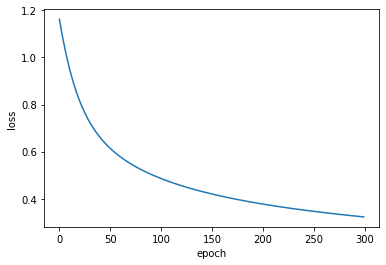

In [ ]:
# 交差エントロピー誤差
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(list(range(len(loss))), loss)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
fig.show()

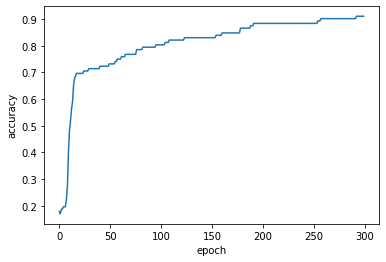

In [ ]:
# 正解率
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(list(range(len(acc))), acc)
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
fig.show()